Valores Faltantes:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


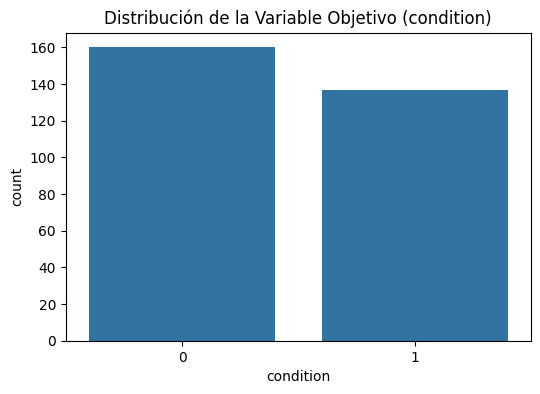

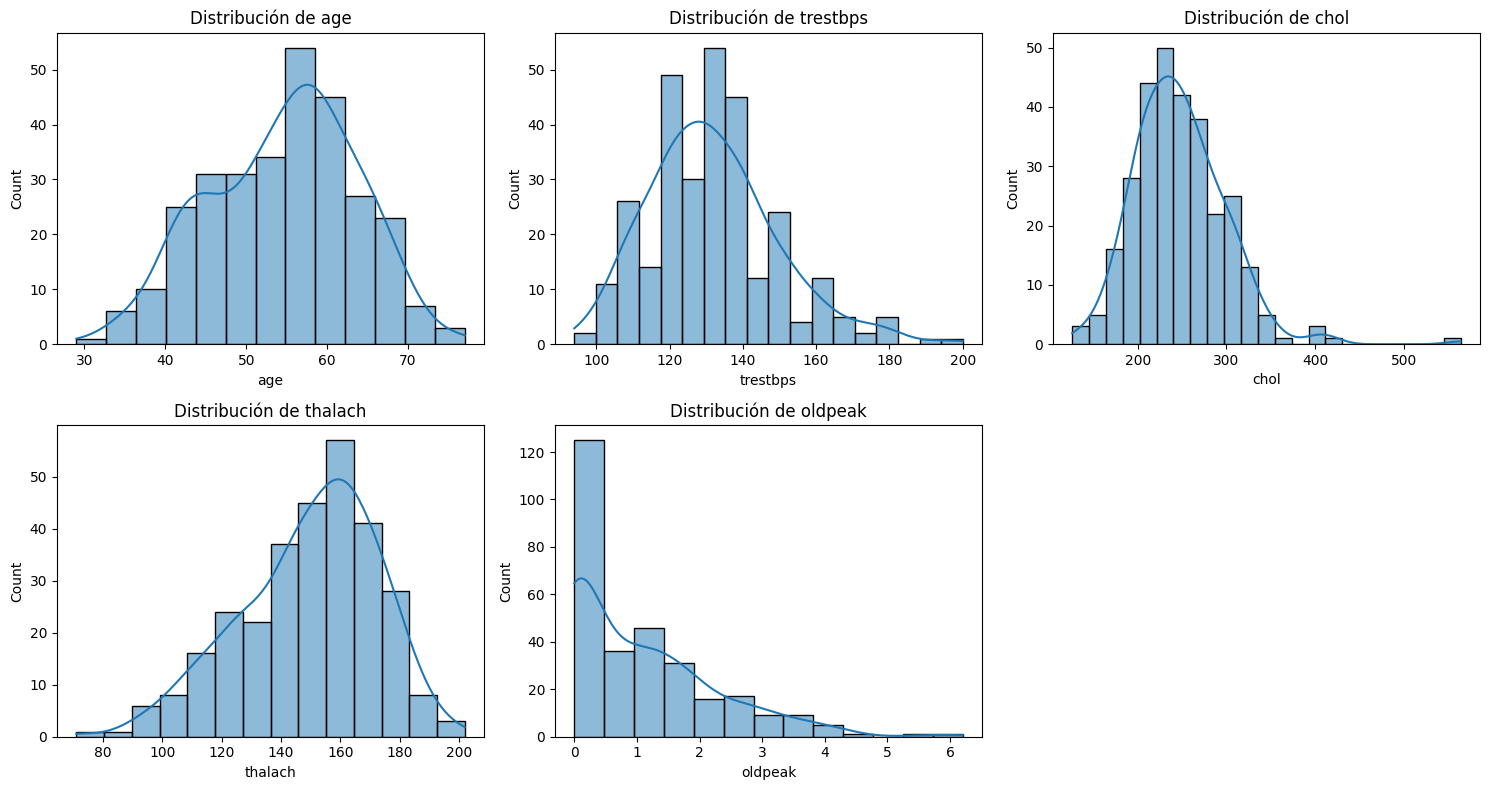

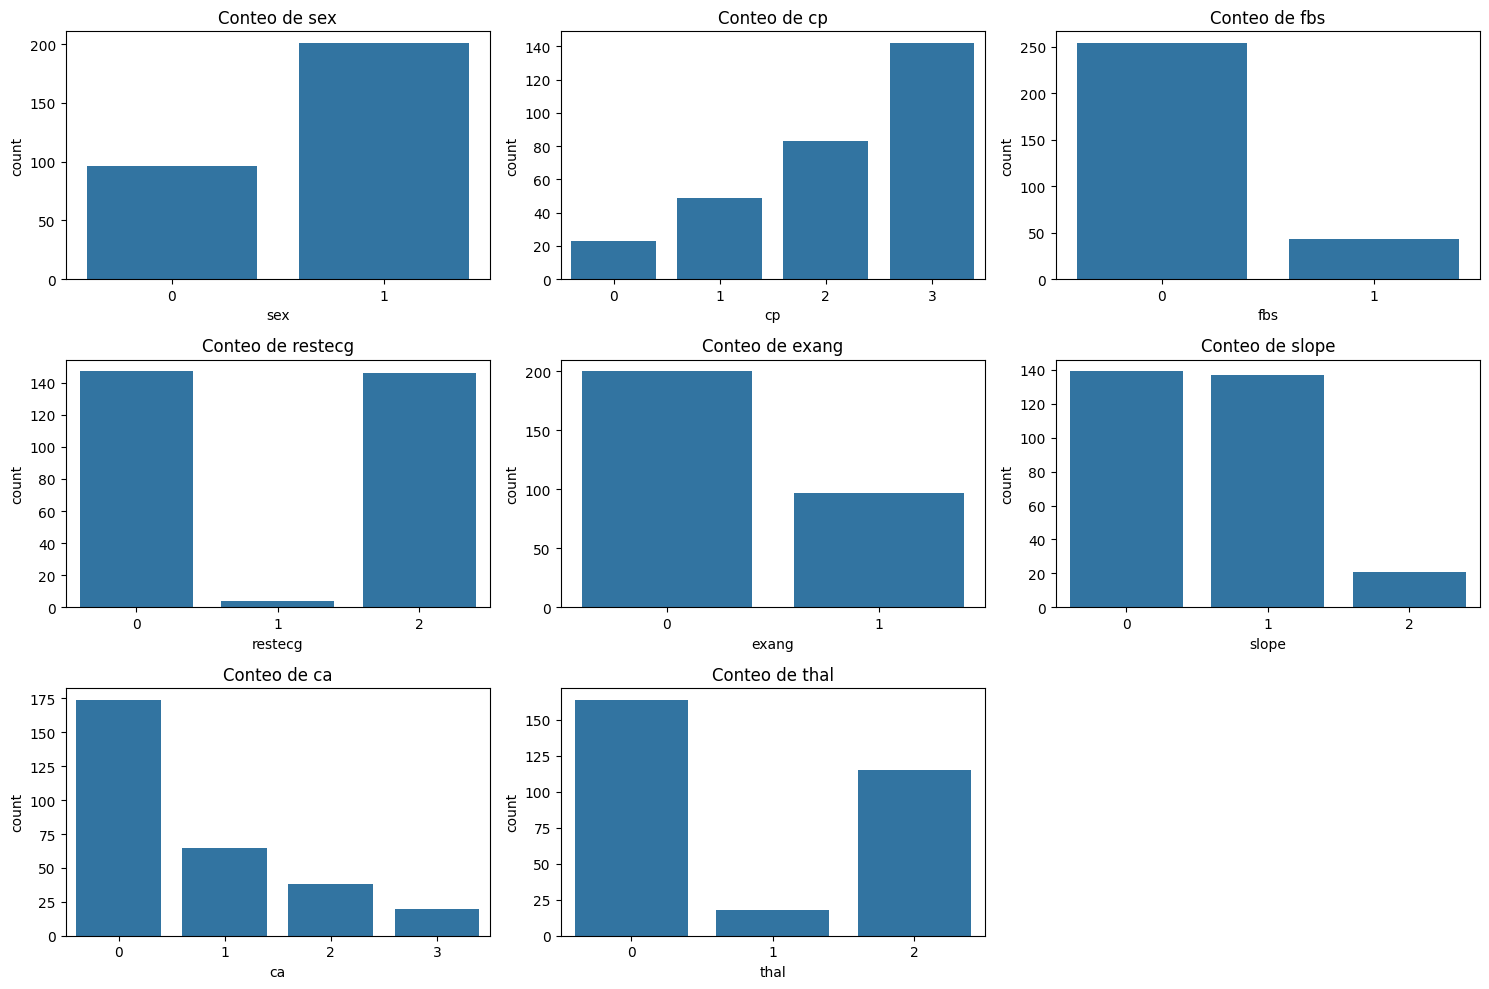

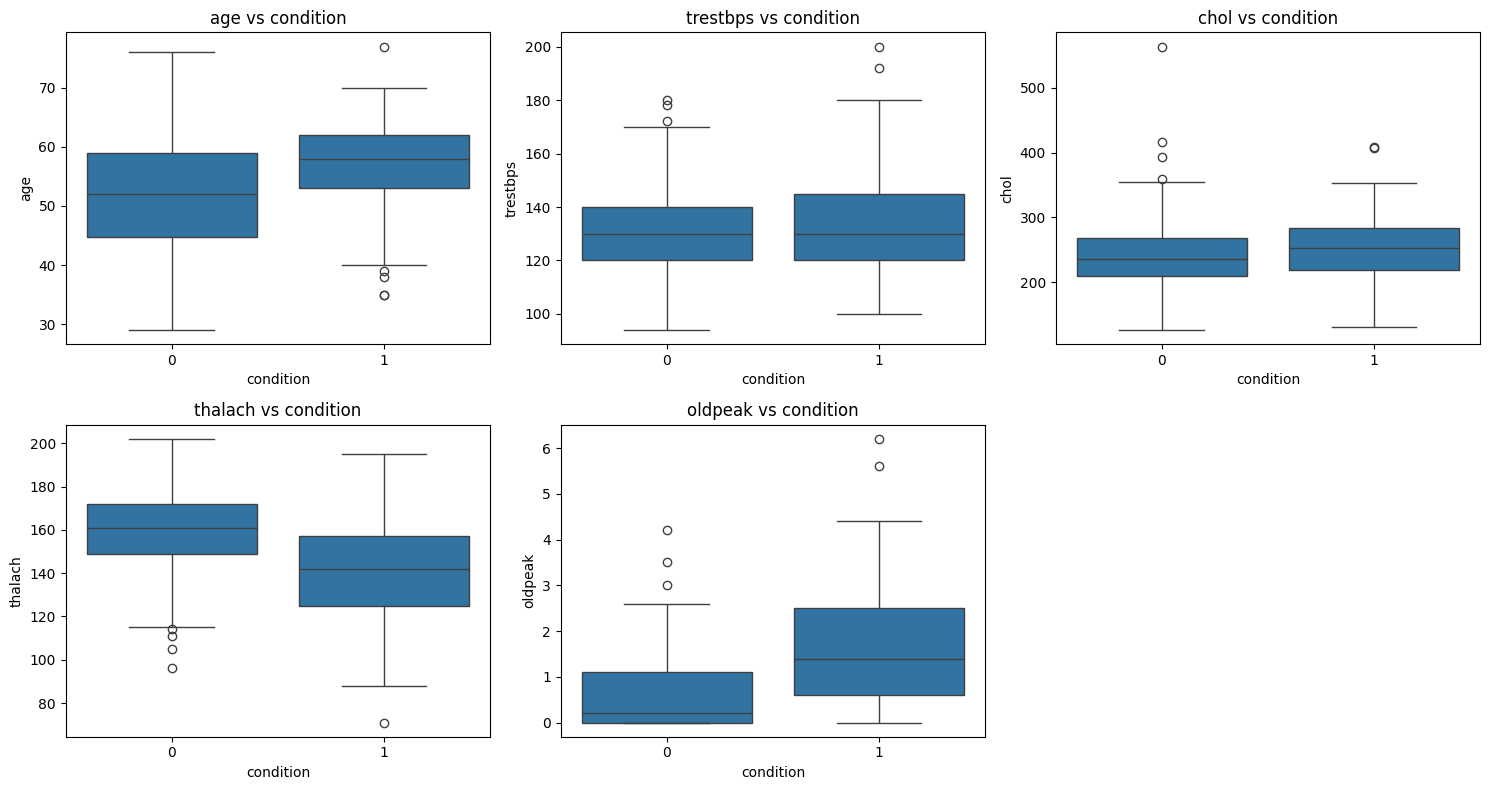

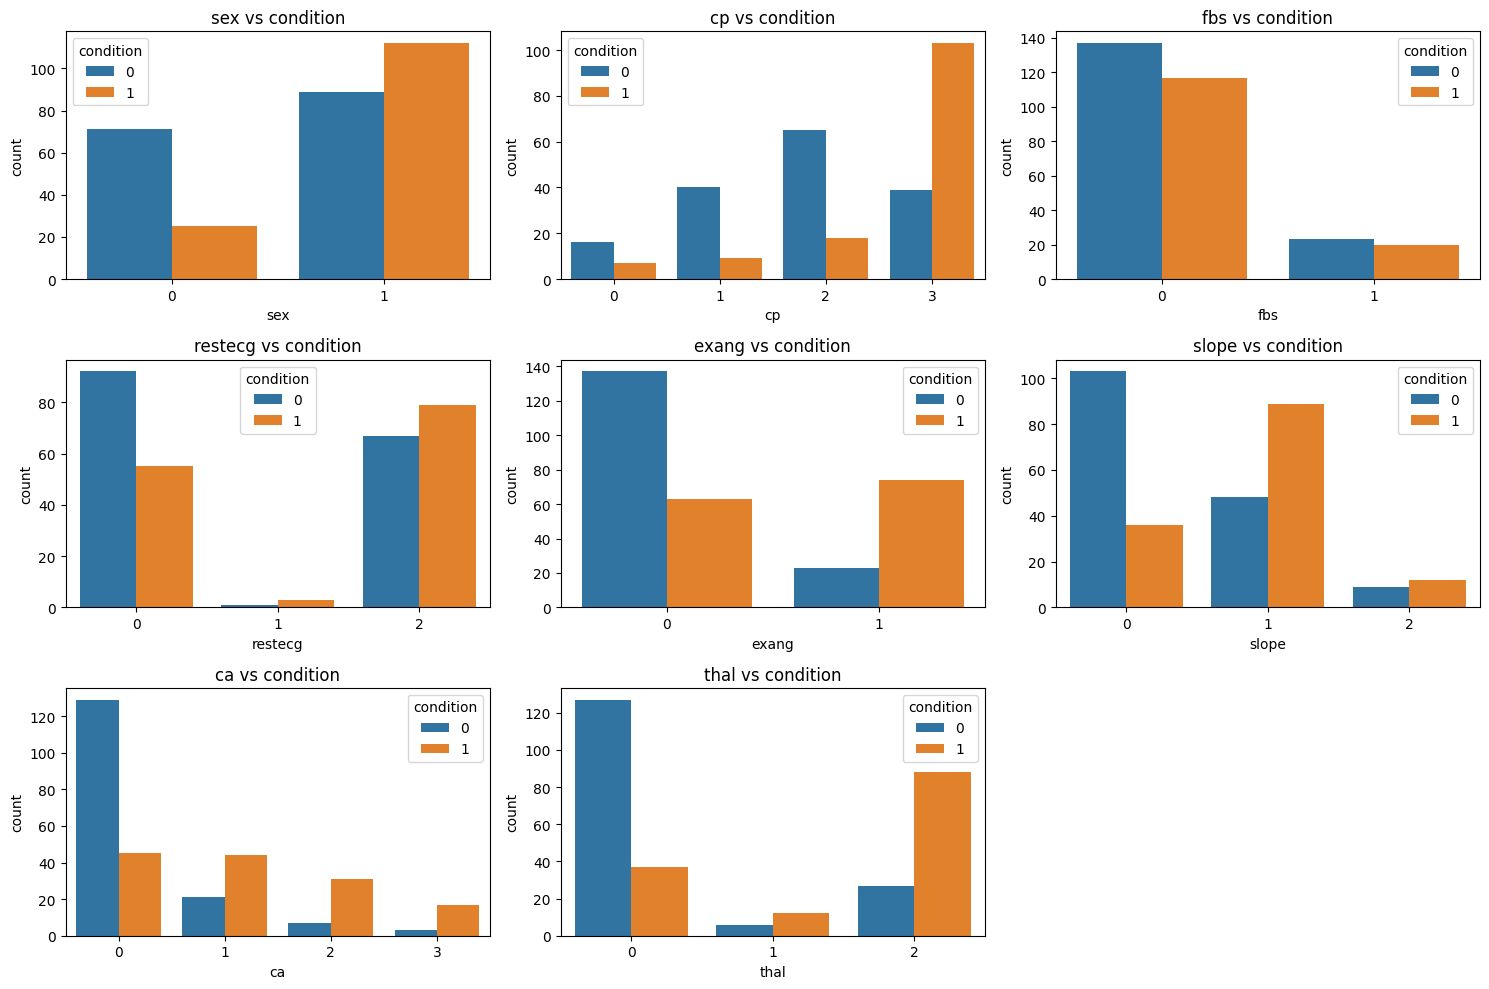

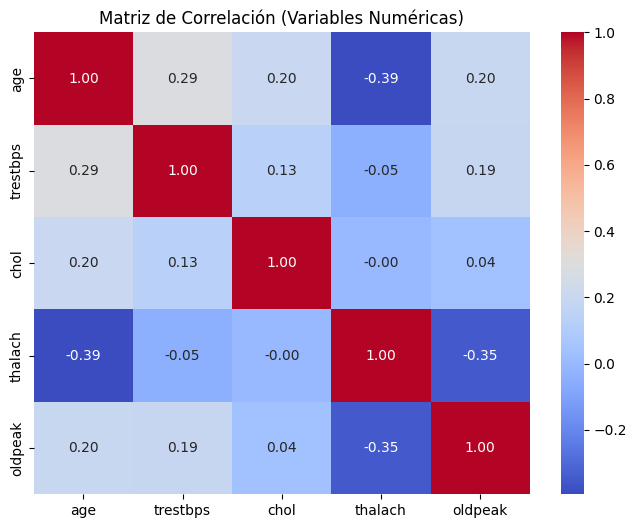

Primeras filas del DataFrame preprocesado:
        age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  fbs_0  \
0  1.600302  1.596266 -0.257179 -0.812095 -0.820813    0.0    1.0    0.0   
1  1.600302  0.468418 -0.160859  0.061157  0.639470    1.0    0.0    1.0   
2  1.268242  1.032342 -0.411292 -1.554358  1.326662    1.0    0.0    1.0   
3  1.157555  0.355633  0.667499  1.065396  0.295874    0.0    1.0    0.0   
4  1.046868 -1.223355 -0.700254 -0.244481  0.639470    0.0    1.0    1.0   

   fbs_1  exang_0  ...  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_0  \
0    1.0      1.0  ...      1.0      0.0   0.0   1.0   0.0   0.0     1.0   
1    0.0      1.0  ...      0.0      0.0   0.0   0.0   1.0   0.0     1.0   
2    0.0      1.0  ...      0.0      1.0   1.0   0.0   0.0   0.0     1.0   
3    1.0      1.0  ...      1.0      0.0   0.0   1.0   0.0   0.0     1.0   
4    0.0      0.0  ...      1.0      0.0   1.0   0.0   0.0   0.0     1.0   

   thal_1  thal_2  condition  
0     0.0   

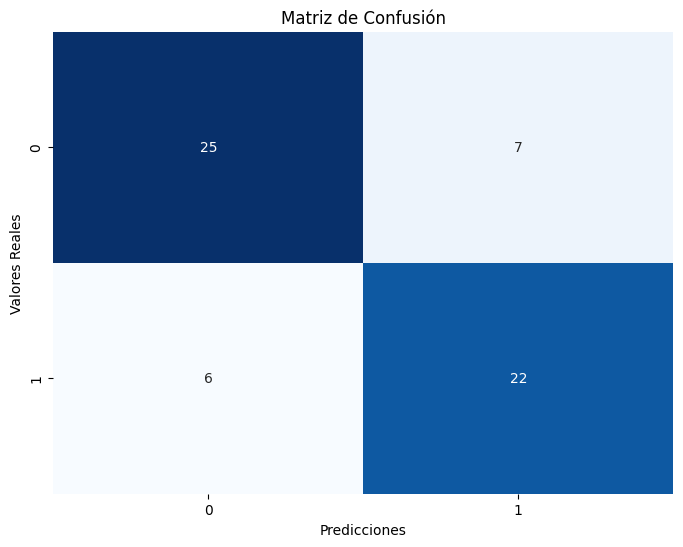

Exactitud (Accuracy): 0.78
Precisión (Precision): 0.76
Recall (Sensibilidad): 0.79
F1-score: 0.77


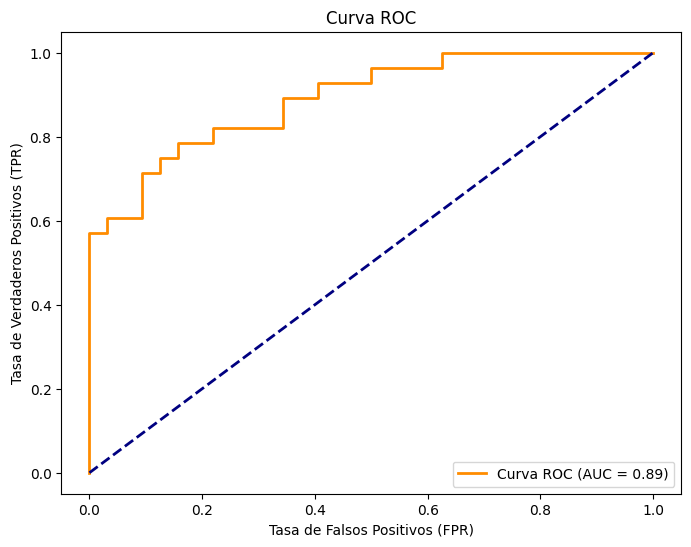

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('../data/logistic_regression_data.csv')

# 1. Identificar Valores Faltantes:
print("Valores Faltantes:")
print(df.isnull().sum())

# 2. Analizar la Distribución de la Variable Objetivo (`condition`):
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='condition')
plt.title('Distribución de la Variable Objetivo (condition)')
plt.show()

# 3. Examinar la Distribución de Variables Numéricas:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

# 4. Examinar la Distribución de Variables Categóricas:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Conteo de {feature}')
plt.tight_layout()
plt.show()

# 5. Analizar la Relación entre las Variables y la Variable Objetivo:
# Variables Numéricas vs. `condition`
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='condition', y=feature)
    plt.title(f'{feature} vs condition')
plt.tight_layout()
plt.show()

# Variables Categóricas vs. `condition`
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=feature, hue='condition')
    plt.title(f'{feature} vs condition')
plt.tight_layout()
plt.show()

# 6. Matriz de Correlación (para variables numéricas):
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Codificación de Variables Categóricas

# Variables categóricas binarias (Label Encoding)
binary_features = ['sex', 'fbs', 'exang']

# Variables categóricas con más de dos categorías (One-Hot Encoding)
multi_category_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Creamos un ColumnTransformer para aplicar las transformaciones de forma eficiente
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', binary_features), # A las binarias no les aplicamos nada ahora, ya que las trataremos en la sección de 'numerical'
        ('multi', OneHotEncoder(handle_unknown='ignore'), multi_category_features)
    ],
    remainder='drop'
)

# 2. Escalado de Variables Numéricas
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Creamos un pipeline para el escalado de las variables numéricas y codificacion de las binarias
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Añadimos un imputador
    ('scaler', StandardScaler())
])

# Creamos un ColumnTransformer para aplicar la transformacion para escalado a las variables numéricas
preprocessor_numerical = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('binary', OneHotEncoder(), binary_features)  # A las variables binarias les aplicamos OneHotEncoding
    ],
    remainder='drop'
)

# Ajustamos y aplicamos las transformaciones a las variables categóricas
df_categorical_encoded = preprocessor.fit_transform(df)

# Obtenemos los nombres de las nuevas columnas después de OneHotEncoding
# Concatenamos los nombres de las columnas binarias con las nuevas columnas generadas por OneHotEncoding
feature_names = binary_features + list(preprocessor.named_transformers_['multi'].get_feature_names_out(multi_category_features))

# Convertimos el resultado a un DataFrame
df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=feature_names)

# Ajustamos y aplicamos las transformaciones a las variables numéricas
df_numerical_scaled = preprocessor_numerical.fit_transform(df)

# Convertimos el resultado a un DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_features + list(preprocessor_numerical.named_transformers_['binary'].get_feature_names_out(binary_features)))

# Combinamos las variables numéricas escaladas con las variables categóricas codificadas
# Nos aseguramos de que ambos DataFrames tengan el mismo índice
df_categorical_encoded.reset_index(drop=True, inplace=True)
df_numerical_scaled.reset_index(drop=True, inplace=True)

# Concatenamos los DataFrames
df_preprocessed = pd.concat([df_numerical_scaled, df_categorical_encoded, df[['condition']]], axis=1)

# Mostramos las primeras filas del DataFrame preprocesado
print("Primeras filas del DataFrame preprocesado:")
print(df_preprocessed.head())

# Verificamos la información del DataFrame preprocesado
print("\nInformación del DataFrame preprocesado:")
print(df_preprocessed.info())

from sklearn.feature_selection import SelectKBest, f_classif

# Separar las características (X) y la variable objetivo (y)
X = df_preprocessed.drop('condition', axis=1)
y = df_preprocessed['condition']

# Aplicar SelectKBest para seleccionar las mejores k características
# Empecemos seleccionando las top 10 características (este número se puede ajustar)
num_features_to_select = 10
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_feature_indices = selector.get_support()
selected_features = X.columns[selected_feature_indices]

print("Características seleccionadas por SelectKBest:")
print(selected_features)

# Crear un nuevo DataFrame con solo las características seleccionadas y la variable objetivo
df_selected = df_preprocessed[selected_features].copy()
df_selected['condition'] = y

print("\nPrimeras filas del DataFrame con características seleccionadas:")
print(df_selected.head())

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_selected.drop('condition', axis=1)
y = df_selected['condition']

# Dividir el dataset en conjuntos de entrenamiento y prueba
# Usaremos un 80% para entrenamiento y un 20% para prueba
# random_state=42 asegura reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de prueba (X_test):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de prueba (y_test):", y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Definir el Modelo
model = LogisticRegression(max_iter=10000)  # Aumentamos max_iter para asegurar la convergencia

# 2. Definir la Grilla de Hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'solver': ['liblinear', 'saga']
}

# 3. Crear el Objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 4. Entrenar el Modelo (GridSearchCV)
grid_search.fit(X_train, y_train)

# 5. Obtener los Mejores Hiperparámetros
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)

# 6. Entrenar el Modelo Final con los Mejores Hiperparámetros
best_model = LogisticRegression(**best_params, max_iter=10000)
best_model.fit(X_train, y_train)

print("Modelo final entrenado con los mejores hiperparámetros.")

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

# 1. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

# 2. Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.2f}")

# 3. Precisión (Precision)
precision = precision_score(y_test, y_pred)
print(f"Precisión (Precision): {precision:.2f}")

# 4. Recall (Sensibilidad)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensibilidad): {recall:.2f}")

# 5. F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

# 6. Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()